In [ ]:
%tensorflow_version 2.x

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

In [ ]:
import sys
import os
sys.path.append('/content/gdrive/My Drive/ODA_CHALLENGE')
os.chdir('/content/gdrive/My Drive/ODA_CHALLENGE')
os.listdir()

In [1]:
import pandas as pd
import numpy as np
import re
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import tensorflow as tf
from tensorflow import keras as keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Attention
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.layers import Embedding
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical
import pydot
import graphviz
from keras.utils import plot_model
import glove_helper
import random
import pickle
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [2]:
!ls

Experiment0_model_history
Experiment0_weights-improvement-01-0.05.hdf5
Experiment0_weights-improvement-05-0.26.hdf5
Experiment1_model_history
Experiment1_weights-improvement-01-0.00.hdf5
Experiment1_weights-improvement-02-0.32.hdf5
Experiment1_weights-improvement-04-0.40.hdf5
Experiment2_model_history
Experiment2_weights-improvement-01-0.17.hdf5
Experiment2_weights-improvement-02-0.33.hdf5
Experiment2_weights-improvement-05-0.84.hdf5
Experiment3_model_history
Experiment3_weights-improvement-01-0.34.hdf5
Experiment3_weights-improvement-03-0.35.hdf5
Experiment3_weights-improvement-05-0.99.hdf5
README.md
Toxic_Comment_challenge.ipynb
__pycache__
data
glove_helper.py
jigsaw-toxic-comment-classification-challenge
jigsaw-toxic-comment-classification-challenge.zip
sample_submission.csv
test.csv
test_labels.csv
train.csv
w266_common


In [3]:
#load data into pandas DF
train_df = pd.read_csv('train.csv')
test_df  = pd.read_csv('train.csv')

In [4]:
#check first 20 rows of the train df to get hang of the data
train_df.head(20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [5]:
#describe the numeric columns
train_df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#check if any row has null
train_df[train_df.isnull().any(axis=1)]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate


In [7]:
#clean the comment_text by removing the punctuations digits and stop words and lower the text
#remove the \n and \t 
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "i'd": "i would", "i'd've": "i would have","i'll": "i will",
                     "i'll've": "i will have","i'm": "i am","i've": "i have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have","she's":"she is","he's":"he is"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

def preprocess_text(sen):
    
    #expand contractions 
    sentence = expand_contractions(sen.lower())
    # Removing \n and \t
    sentence = sentence.replace('\t',' ')
    sentence = sentence.replace('\n',' ')
    # Remove punctuations and foreign characters and digits
    sentence = ' '.join(re.sub(r'[^A-Za-z ]+', '', sentence).split())

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+",' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+',' ', sentence)

    return sentence

train_df['comment_text'] = train_df['comment_text'].apply(lambda x: preprocess_text(str(x))) 
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: preprocess_text(str(x)))
#train_df['comment_text'] = train_df['comment_text'].str.replace('\t',' ') 
#test_df['comment_text'] = test_df['comment_text'].str.replace('\t',' ')
#train_df['comment_text'] = train_df['comment_text'].str.replace('\d+', ' ')
#test_df['comment_text'] = test_df['comment_text'].str.replace('\d+', ' ')
#train_df['comment_text'] = train_df['comment_text'].str.lower()
#test_df['comment_text'] = test_df['comment_text'].str.lower()
#train_df['comment_text'] = train_df['comment_text'].str.replace("[^a-z ]",'')
#test_df['comment_text'] = test_df['comment_text'].str.replace("[^a-z ]",'')

In [8]:
stop = stopwords.words('english')
train_df['comment_text'] = train_df['comment_text'].apply(lambda x : ' '.join([y for y in x.split() if y not in stop]))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x : ' '.join([y for y in x.split() if y not in stop]))


In [9]:
train_df.head(20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww matches background colour seemingly stuck...,0,0,0,0,0,0
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0
3,0001b41b1c6bb37e,cannot make real suggestions improvement wonde...,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0
5,00025465d4725e87,congratulations well use tools well talk,0,0,0,0,0,0
6,0002bcb3da6cb337,cocksucker piss around work,1,1,1,0,1,0
7,00031b1e95af7921,vandalism matt shirvington article reverted pl...,0,0,0,0,0,0
8,00037261f536c51d,sorry word nonsense offensive anyway intending...,0,0,0,0,0,0
9,00040093b2687caa,alignment subject contrary dulithgow,0,0,0,0,0,0


In [10]:
#get the maximum words in train comments
train_df['comment_text'].str.split().str.len().max()

1250

In [11]:
train_df['comment_length'] = train_df['comment_text'].str.split().str.len()

In [12]:
train_df[train_df['comment_length'] == 1250]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_length
32143,5572234220e43ea2,pig pig pig pig pig pig pig pig pig pig pig pi...,1,0,0,0,0,0,1250
61793,a55e3736cb1c2db1,oh noes oh noes oh noes oh noes oh noes oh noe...,0,0,0,0,0,0,1250
76598,cd135d9358a9e9ea,die fag die fag die fag die fag die fag die fa...,1,0,0,0,0,0,1250
150039,65d66bf057752682,lol lol lol lol lol lol lol lol lol lol lol lo...,0,0,0,0,0,0,1250


<AxesSubplot:>

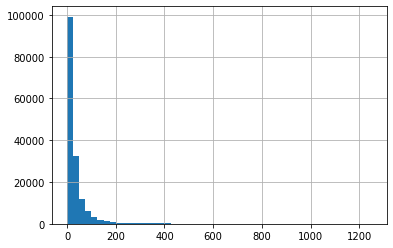

In [13]:
#histogram of comment length
train_df['comment_length'].hist(bins=50)

<AxesSubplot:>

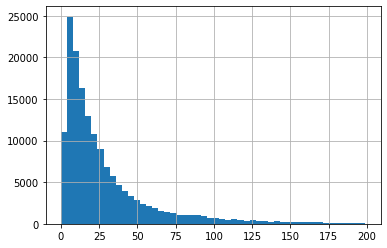

In [14]:
#histogram of comment length
train_df[train_df['comment_length'] < 200]['comment_length'].hist(bins=50)

In [15]:
#create tokenizer to create tokens from the raw data
def tokenize_data(dataset,num_words=None):
    tokenizer = Tokenizer(num_words,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'+"''",oov_token='<unk>')
    tokenizer.fit_on_texts(dataset)
    vocab = {}
    for word,i in tokenizer.word_index.items():
        if num_words is not None:
            if i <= num_words:
                vocab[word] = i
        else:
            vocab[word] = i
    #vocab = tokenizer.word_index
    id_vocab = {value: key for key, value in vocab.items()}
    return (tokenizer,vocab,id_vocab)

In [16]:
tokenizer,vocab,id_vocab = tokenize_data(train_df['comment_text'])

In [17]:
len(vocab)

219450

In [16]:
ndim = 300
max_features = 100000
max_len = 150

In [17]:
tokenizer,vocab,id_vocab = tokenize_data(train_df['comment_text'],num_words=max_features)

In [18]:
vocab_size = len(vocab)
print(vocab_size)

100000


In [19]:
def create_embedding_matrix(word_index,vocab_size=50000,ndim=100):
    hands = glove_helper.Hands(ndim)
    embedding_matrix = np.zeros((vocab_size+1,ndim))
    for word,i in word_index.items():
        if i<=vocab_size:
            embedding_vector = hands.get_vector(word,strict=False)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector
    return embedding_matrix
embedding_matrix = create_embedding_matrix(vocab,vocab_size,ndim)
embedding_matrix.shape

Loading vectors from data/glove/glove.6B.zip
Parsing file: data/glove/glove.6B.zip:glove.6B.300d.txt
Found 400,000 words.
Parsing vectors... Done! (W.shape = (400003, 300))


(100001, 300)

In [20]:
#get the list X and Y from training 
classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train_df[classes].values
X = train_df['comment_text']

def vectorize_data(tokenizer_obj,text,max_len):
    text_seq = tokenizer_obj.texts_to_sequences(text)
    text_seq_padded = pad_sequences(text_seq,max_len,padding='post', truncating='post')
    return text_seq_padded

X_padded = vectorize_data(tokenizer,X,max_len)


In [21]:
X_train,X_valid, Y_train, Y_valid = train_test_split(X_padded, y, test_size = 0.1,random_state=42)

In [22]:
print(X_train.shape)
print(X_valid.shape)
print(Y_train.shape)
print(Y_valid.shape)

(143613, 150)
(15958, 150)
(143613, 6)
(15958, 6)


In [23]:
def create_model(embedding_matrix,
                 num_unit_lstm = 128,
                 num_layers_lstm = 2,
                 num_dense_layer_units = 128,
                 dropout_rate = 0.5,
                 num_dense_layers = 2,
                 cnn_num_filters = 200
                 ):
    input_layer = layers.Input(shape=(max_len,),name='Input_layer')
    Enbedding_layer = Embedding(max_features+1,
                                ndim,
                                mask_zero=True,
                                name='Embedding_layer')(input_layer)
    for i in range(num_layers_lstm):
        if i ==0 :
            bidirection_layer = layers.Bidirectional(layers.LSTM(num_unit_lstm,
                                                          return_sequences=True,
                                                          dropout=dropout_rate,
                                                          #recurrent_dropout=dropout_rate,
                                                          recurrent_initializer='glorot_uniform',
                                                          name="bid"+str(i)))(Enbedding_layer)
        else:
            bidirection_layer = layers.Bidirectional(layers.LSTM(num_unit_lstm,
                                                          return_sequences=True,
                                                          dropout=dropout_rate,
                                                          #recurrent_dropout=dropout_rate,
                                                          recurrent_initializer='glorot_uniform',
                                                          name="bid"+str(i)))(bidirection_layer)
    
    cnn_layer1 = layers.Conv1D(filters=cnn_num_filters,
                                        kernel_size=2,
                                        padding="valid",
                                        activation="relu")(bidirection_layer)
    cnn_layer1 = layers.GlobalMaxPool1D()(cnn_layer1)
    cnn_layer2 = layers.Conv1D(filters=cnn_num_filters,
                                        kernel_size=3,
                                        padding="valid",
                                        activation="relu")(bidirection_layer)
    cnn_layer2 = layers.GlobalMaxPool1D()(cnn_layer2)
    cnn_layer3 = layers.Conv1D(filters=cnn_num_filters,
                                        kernel_size=4,
                                        padding="valid",
                                        activation="relu")(bidirection_layer)
    cnn_layer3 = layers.GlobalMaxPool1D()(cnn_layer3)

    concatenated = tf.concat([cnn_layer1, cnn_layer2, cnn_layer3], axis=-1)
    for j in range(num_dense_layers):
        if j == 0:
            dense = layers.Dense(units=num_dense_layer_units)(concatenated)
            dense = layers.BatchNormalization()(dense)
            dense = layers.Activation('relu')(dense)
            dropout = layers.Dropout(rate=dropout_rate)(dense)
        else:
            dense = layers.Dense(units=num_dense_layer_units)(dropout)
            dense = layers.BatchNormalization()(dense)
            dense = layers.Activation('relu')(dense)
            dropout = layers.Dropout(rate=dropout_rate)(dense)
    
    Dense_layer_final = layers.Dense(6,activation='sigmoid',name='Dense_layer_final')(dropout)
    model = Model(input_layer,Dense_layer_final)
    model.get_layer("Embedding_layer").set_weights([embedding_matrix])
    model.get_layer("Embedding_layer").trainable = False
    return model

In [38]:
num_unit_lstm_list = [64,128,160,256]
num_layers_lstm_list = [2,3,4]
num_dense_layer_units_list = [64,128,160,256]
dropout_rate_list = [0.2,0.3,0.4,0.5]
num_dense_layers_list = [2,3,4]
cnn_num_filters_list = [100,150,200,250]

In [34]:
#create 4 experiments using random search
Experiment_Dic = {}
for i in range(4):
    Experiment_Dic['Experiment'+str(i)] = {}
    Experiment_Dic['Experiment'+str(i)]['num_unit_lstm']=random.choice(num_unit_lstm_list)
    Experiment_Dic['Experiment'+str(i)]['num_layers_lstm'] =random.choice(num_layers_lstm_list)
    Experiment_Dic['Experiment'+str(i)]['num_dense_layer_units']=random.choice(num_dense_layer_units_list)
    Experiment_Dic['Experiment'+str(i)]['dropout_rate']=random.choice(dropout_rate_list)
    Experiment_Dic['Experiment'+str(i)]['num_dense_layers']=random.choice(num_dense_layers_list)
    Experiment_Dic['Experiment'+str(i)]['cnn_num_filters']=random.choice(cnn_num_filters_list)

print(Experiment_Dic)

{'Experiment0': {'num_unit_lstm': 160, 'num_layers_lstm': 4, 'num_dense_layer_units': 64, 'dropout_rate': 0.2, 'num_dense_layers': 2, 'cnn_num_filters': 200}, 'Experiment1': {'num_unit_lstm': 160, 'num_layers_lstm': 3, 'num_dense_layer_units': 256, 'dropout_rate': 0.4, 'num_dense_layers': 4, 'cnn_num_filters': 200}, 'Experiment2': {'num_unit_lstm': 160, 'num_layers_lstm': 4, 'num_dense_layer_units': 160, 'dropout_rate': 0.2, 'num_dense_layers': 2, 'cnn_num_filters': 150}, 'Experiment3': {'num_unit_lstm': 64, 'num_layers_lstm': 4, 'num_dense_layer_units': 256, 'dropout_rate': 0.3, 'num_dense_layers': 3, 'cnn_num_filters': 150}}


In [24]:
Experiment_Dic = {'Experiment0': {'num_unit_lstm': 160, 
                                  'num_layers_lstm': 4, 
                                  'num_dense_layer_units': 64, 
                                  'dropout_rate': 0.2, 
                                  'num_dense_layers': 2, 
                                  'cnn_num_filters': 200}, 
                  'Experiment1': {'num_unit_lstm': 160, 
                                  'num_layers_lstm': 3, 
                                  'num_dense_layer_units': 256, 
                                  'dropout_rate': 0.4, 
                                  'num_dense_layers': 4, 
                                  'cnn_num_filters': 200}, 
                  'Experiment2': {'num_unit_lstm': 160, 
                                  'num_layers_lstm': 4, 
                                  'num_dense_layer_units': 160, 
                                  'dropout_rate': 0.2, 
                                  'num_dense_layers': 2, 
                                  'cnn_num_filters': 150}, 
                  'Experiment3': {'num_unit_lstm': 64, 
                                  'num_layers_lstm': 4, 
                                  'num_dense_layer_units': 256, 
                                  'dropout_rate': 0.3, 
                                  'num_dense_layers': 3, 
                                  'cnn_num_filters': 150}}

In [25]:
precision_obj = keras.metrics.Precision()
recall_obj = keras.metrics.Recall()
def run_experiment(Experiment_Dic,
                   Experiment_No,
                   embedding_matrix):
    ExperimentNo = 'Experiment'+str(Experiment_No)
    print("Running ",ExperimentNo)
    num_unit_lstm = Experiment_Dic[ExperimentNo]['num_unit_lstm']
    num_layers_lstm = Experiment_Dic[ExperimentNo]['num_layers_lstm']
    num_dense_layer_units = Experiment_Dic[ExperimentNo]['num_dense_layer_units']
    dropout_rate = Experiment_Dic[ExperimentNo]['dropout_rate']
    num_dense_layers = Experiment_Dic[ExperimentNo]['num_dense_layers']
    cnn_num_filters = Experiment_Dic[ExperimentNo]['cnn_num_filters']
    model = create_model(embedding_matrix,
                 num_unit_lstm,
                 num_layers_lstm,
                 num_dense_layer_units,
                 dropout_rate,
                 num_dense_layers,
                 cnn_num_filters)
    
    model.compile(
                   optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy',precision_obj,recall_obj]
                 )
    filepath=ExperimentNo+"_weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
    earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
    mcp_save = ModelCheckpoint(filepath, save_best_only=True, monitor='val_accuracy', mode='max')
    reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

    history = model.fit(
                        X_train[:40960],
                        Y_train[:40960],
                        validation_split=0.1,
                        callbacks=[earlyStopping, mcp_save, reduce_lr_loss],
                        batch_size=32,
                        shuffle=True,
                        epochs=5)
    with open(ExperimentNo+'_model_history', 'wb') as file_history:
        pickle.dump(history.history, file_history)
    

In [ ]:
for i in range(4):
    run_experiment(Experiment_Dic,
                   i,
                   embedding_matrix)

Running  Experiment0
Epoch 1/5
1152/1152 [==============================] - 2313s 2s/step - loss: 0.1078 - accuracy: 0.5903 - precision: 0.5433 - recall: 0.4654 - val_loss: 0.0708 - val_accuracy: 0.9937 - val_precision: 0.6691 - val_recall: 0.6885 - lr: 0.0010
Epoch 2/5
1152/1152 [==============================] - 2610s 2s/step - loss: 0.0625 - accuracy: 0.9133 - precision: 0.7818 - recall: 0.5902 - val_loss: 0.0598 - val_accuracy: 0.9907 - val_precision: 0.7578 - val_recall: 0.6552 - lr: 0.0010
Epoch 3/5
1152/1152 [==============================] - 2358s 2s/step - loss: 0.0592 - accuracy: 0.9439 - precision: 0.7900 - recall: 0.6080 - val_loss: 0.0607 - val_accuracy: 0.9937 - val_precision: 0.8202 - val_recall: 0.5682 - lr: 0.0010
Epoch 4/5
1016/1152 [=========================>....] - ETA: 4:41 - loss: 0.0546 - accuracy: 0.9777 - precision: 0.8082 - recall: 0.6191

KeyboardInterrupt: 

In [64]:
def plot_experiments(ExperimentNumber):
    ExperimentNo = "Experiment"+str(ExperimentNumber)
    if ( os.path.exists(ExperimentNo+'_model_history')) :
        
        with open(ExperimentNo+'_model_history', 'rb') as file_history:
            history = pickle.load( file_history )

        fig, axs = plt.subplots(2, 2,figsize=(15,15))
        fig.suptitle('++++++++++++++++++++++++'+ExperimentNo+'++++++++++++++++++++++',fontsize=14)
        # Plot training & validation accuracy values
        axs[0, 0].plot(history['accuracy'])
        axs[0, 0].plot(history['val_accuracy'])
        axs[0, 0].set_title(ExperimentNo+' Model accuracy')
        axs[0, 0].set_ylabel('Accuracy')
        axs[0, 0].set_xlabel('Epoch')
        axs[0, 0].legend(['Train', 'Val'], loc='upper left')
        #plt.show()

        # Plot training & validation loss values
        axs[0, 1].plot(history['loss'])
        axs[0, 1].plot(history['val_loss'])
        axs[0, 1].set_title(ExperimentNo+' Model loss')
        axs[0, 1].set_ylabel('Binary Entropy Loss')
        axs[0, 1].set_xlabel('Epoch')
        axs[0, 1].legend(['Train', 'Val'], loc='upper left')
        #plt.show()


        # Plot training & validation precision values
        axs[1, 0].plot(history['precision])
        axs[1, 0].plot(history['val_precision'])
        axs[1, 0].set_title(ExperimentNo+' Model precision')
        axs[1, 0].set_ylabel('Precision')
        axs[1, 0].set_xlabel('Epoch')
        axs[1, 0].legend(['Train', 'Val'], loc='upper left')
        #plt.show()

        # Plot training & validation recall values
        axs[1, 1].plot(history['recall'])
        axs[1, 1].plot(history['val_recall'])
        axs[1, 1].set_title(ExperimentNo+' Model recall')
        axs[1, 1].set_ylabel('Recall')
        axs[1, 1].set_xlabel('Epoch')
        axs[1, 1].legend(['Train', 'Val'], loc='upper left')
        #plt.show()

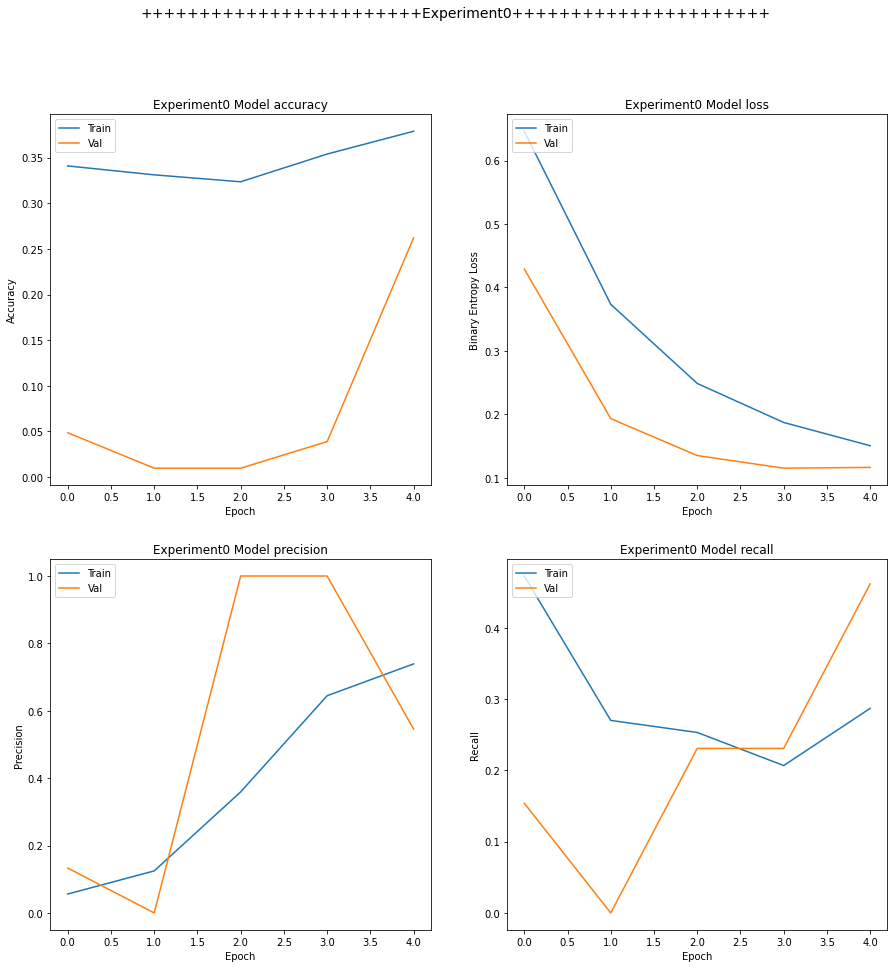

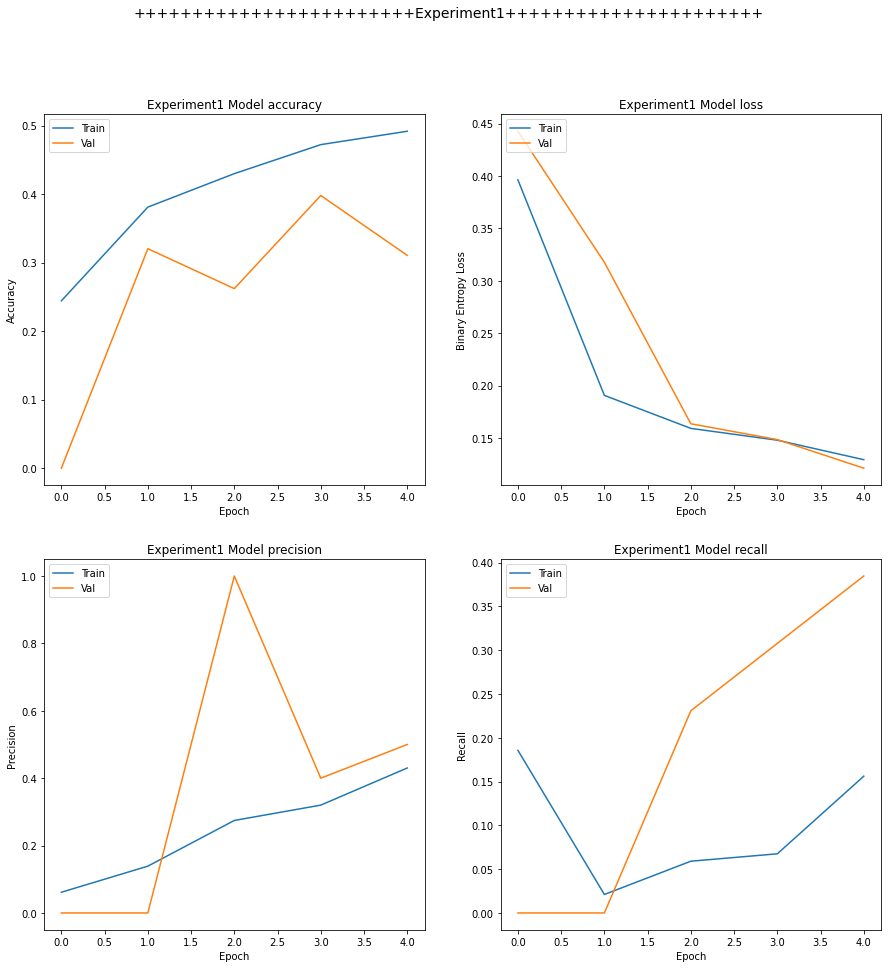

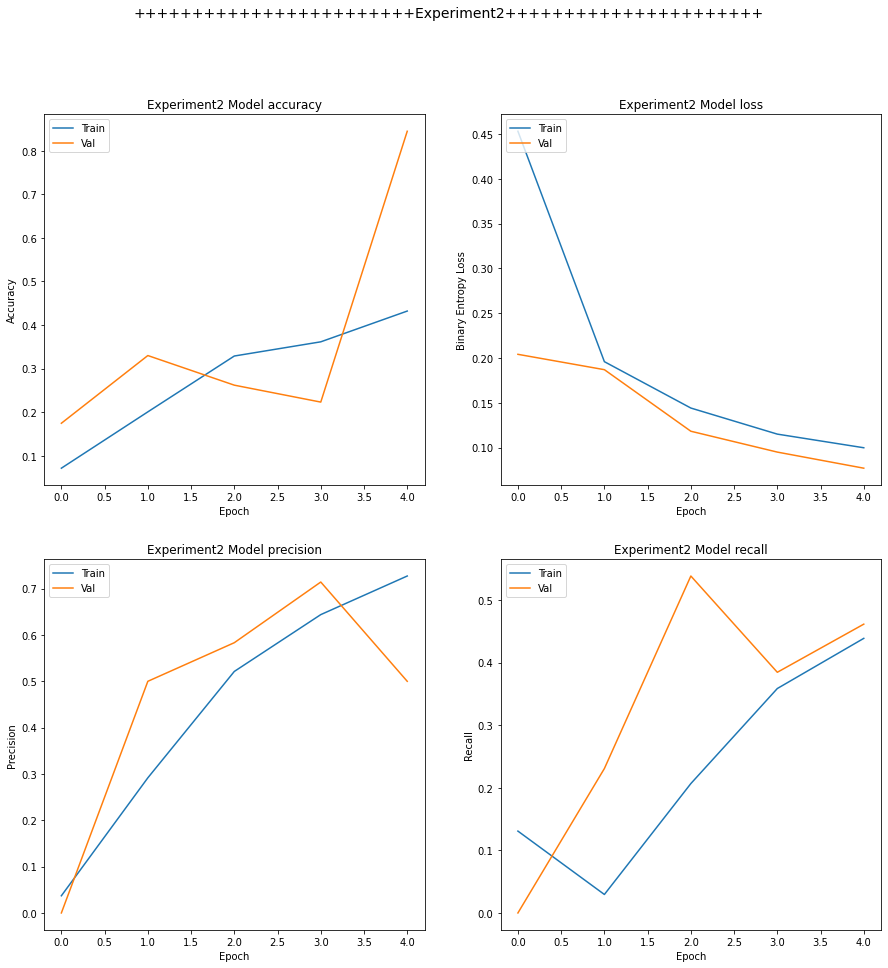

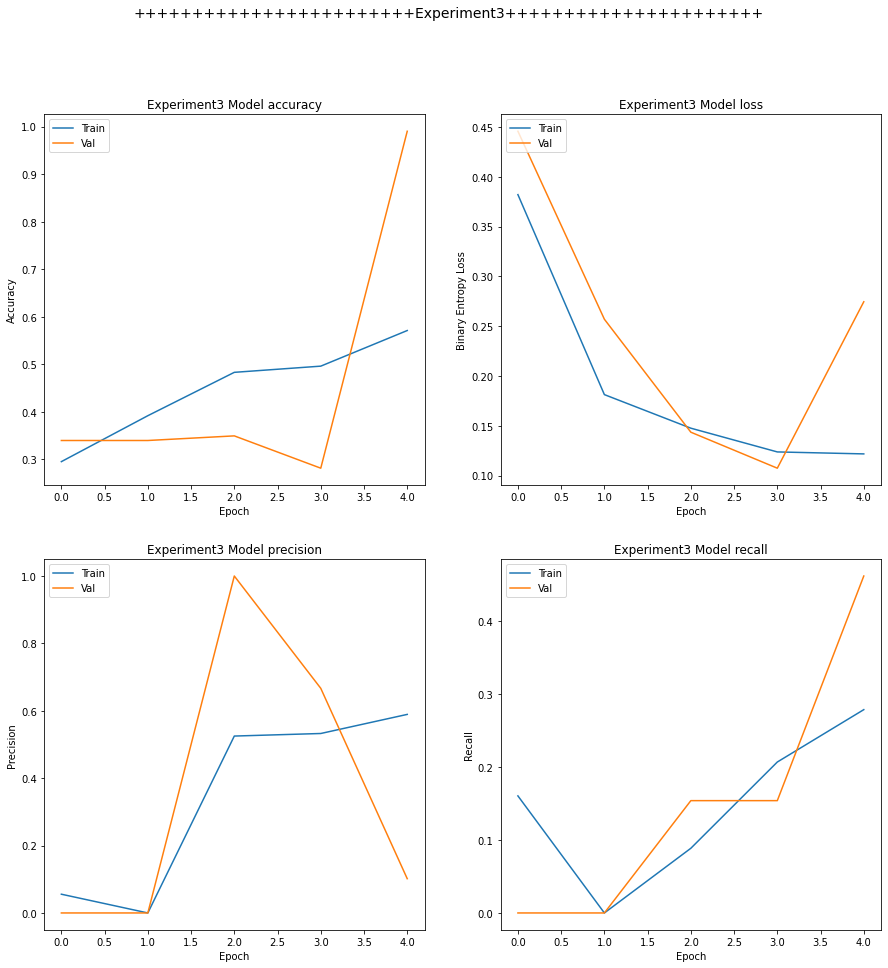

In [65]:
for i in range(4):
    plot_experiments(i)

In [66]:
def find_val_acc(ExperimentNumber):
    #accuracy,loss,precision,recall = [],[],[],[]
    #val_accuracy,val_loss,val_precision,val_recall = [],[],[],[]
    ExperimentNo = "Experiment"+str(ExperimentNumber)
    if ( os.path.exists(ExperimentNo+'_model_history')) :
        
        with open(ExperimentNo+'_model_history', 'rb') as file_history:
            history = pickle.load( file_history )
        accuracy = max(history['accuracy'])
        loss = min(history['loss'])
        precision = max(history['precision'])
        recall = max(history['recall'])
        val_accuracy = max(history['val_accuracy'])
        val_loss = min(history['val_loss'])
        val_precision = max(history['val_precision'])
        val_recall= max(history['val_recall'])
        return (accuracy,loss,precision,recall, val_accuracy,val_loss,val_precision,val_recall)
def create_val_acc_matrix():
    Experiment,accuracy,loss,precision,recall = [],[],[],[],[]
    val_accuracy,val_loss,val_precision,val_recall = [],[],[],[]
    for i in range(4):
        accuracy_i,loss_i,precision_i,recall_i, val_accuracy_i,val_loss_i,val_precision_i,val_recall_i =\
        find_val_acc(i)
        Experiment.append(i)
        accuracy.append(accuracy_i)
        loss.append(loss_i)
        precision.append(precision_i)
        recall.append(recall_i)
        val_accuracy.append(val_accuracy_i)
        val_loss.append(val_loss_i)
        val_precision.append(val_precision_i)
        val_recall.append(val_recall_i)
    df = pd.DataFrame()
    df['Experiment'] = Experiment
    df['accuracy'] = accuracy
    df['loss'] = loss
    df['precision'] = precision
    df['recall'] = recall
    df['val_accuracy'] = val_accuracy
    df['val_loss'] = val_loss
    df['val_precision'] = val_precision
    df['val_recall'] = val_recall
    return df


val_acc_matrix = create_val_acc_matrix()

val_acc_matrix

,Experiment,accuracy,loss,precision,recall,val_accuracy,val_loss,val_precision,val_recall
0,0,0.378936,0.150615,0.739130,0.472574,0.262136,0.115187,1.000000,0.461538
1,1,0.491857,0.129412,0.430233,0.185654,0.398058,0.121304,1.000000,0.384615
2,2,0.432139,0.099729,0.727273,0.438819,0.844660,0.076918,0.714286,0.538462
3,3,0.571118,0.121735,0.589286,0.278481,0.990291,0.107387,1.000000,0.461538
